In [1]:
!pip install opencv-python matplotlib tensorflow

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.6 MB 1.6 MB/s eta 0:00:05
     - -------------------------------------- 0.2/7.6 MB 2.5 MB/s eta 0:00:03
     - -------------------------------------- 0.4/7.6 MB 2.5 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/7.6 MB 3.8 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.6 MB 6.3 MB/s eta 0:00:01
     ---------- ----------------------------- 1.9/7.6 MB 7.2 MB/s eta 0:00:01
     ------------ --------------------------- 2.3/7.6 MB 7.1 MB/s eta 0:00:01
     --------------- ------------------------ 2.9/7.6 MB 8.1 MB/s eta 0:00:01
     ------------------ --------------------- 3.5/7.6 MB 8.5 MB/s eta 0:00:01
     --------------------- ------------------ 4.2/7.6 MB 9.2 MB/s eta 0:00:01
     ------------------------- -------------- 4.8/7.6 MB 9.6 MB/s eta 0:00:01


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list


Package                      Version
---------------------------- --------
absl-py                      1.4.0
anyio                        3.7.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.1.1
executing                    1.2.0
fastjsonschema               2.17.1
flatbuffers                  23.5.26
fon


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
import tensorflow as tf
import os

In [174]:
#remove bad images

import cv2
import imghdr

data_path = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Removing image {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Removing image data\sad\192px.svg
Removing image data\sad\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Removing image data\sad\2bnso9uiwlhrikrx.jpg
Removing image data\sad\39843138-sad-man.jpg
Removing image data\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Removing image data\sad\crying-sad.gif
Removing image data\sad\depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg
Removing image data\sad\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Removing image data\sad\depressed-man-studio-shot-260nw-404652526.jpg
Removing image data\sad\sadskull-totebag-texture.jpg
Removing image data\sad\secret-signs-of-loneliness-01-1440x810.jpg
Removing image data\sad\v4-460px-Make-a-Sad-Person-Happy-Step-2.jpg.webp
Removing image data\sad\vector.svg
Removing image data\sad\vector10.svg
Removing image data\sad\vector11.svg
Removing image data\sad\vector12.svg
Removing image data\sad\vector13.svg
Removing image data\sad\vector

In [175]:
#load data

import numpy as np
from matplotlib import pyplot as plt

#build data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

#access pipeline
iterator = data.as_numpy_iterator()
batch = iterator.next()




Found 336 files belonging to 2 classes.


In [176]:
batch[1]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [177]:
#preprocessing data

#scaling data
data = data.map(lambda x,y: (x/255, y))

In [178]:
scaled_iterator = data.as_numpy_iterator()

In [179]:
batch = scaled_iterator.next()
batch[0].max()

1.0

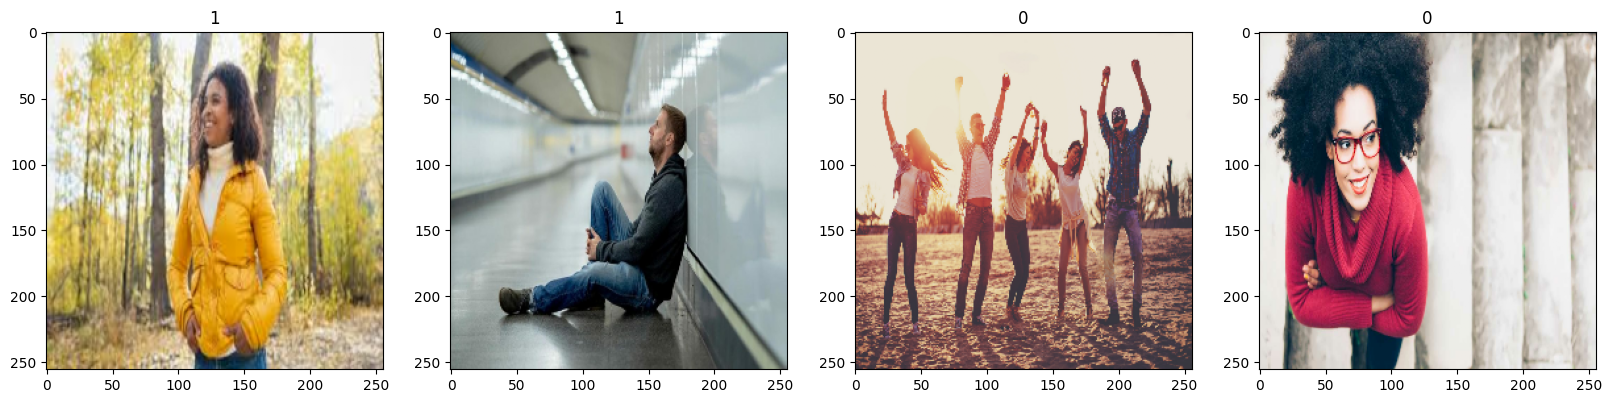

In [180]:
fix ,ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [181]:
#split data for training and testing
len(data)


11

In [185]:
len(data)
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [186]:
val_size + test_size + train_size

11

In [187]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [188]:
#build model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [189]:
#initialize model
model = Sequential()

In [190]:
#add layers to model
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [191]:
#compile model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [193]:
#train model
logpath = 'logs'

#callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logpath)

In [194]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 1s/step - loss: 1.0158 - accuracy: 0.5179 - val_loss: 0.6849 - val_accuracy: 0.7396
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6730 - accuracy: 0.6696 - val_loss: 0.6007 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.6510 - accuracy: 0.6473 - val_loss: 0.6410 - val_accuracy: 0.6042
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.5736 - accuracy: 0.6920 - val_loss: 0.5201 - val_accuracy: 0.8021
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.5976 - accuracy: 0.7009 - val_loss: 0.4788 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.5846 - accuracy: 0.7098 - val_loss: 0.5947 - val_accuracy: 0.8229
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.5817 - accuracy: 0.8304 - val_loss: 0.5594 - val_accuracy: 0.7292
Epoch 8/20
7/7 [========================

In [195]:
#testing
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [196]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [197]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 174ms/step


In [198]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


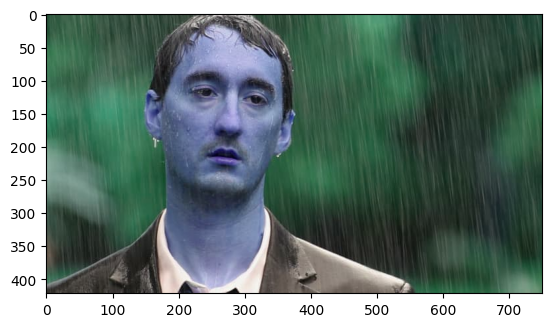

In [218]:
img = cv2.imread('sadtest.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256, 256))

In [219]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [220]:
if yhat > 0.5:
    print('predicted is sad')
else:
    print('predicted is happy')

predicted is sad


In [221]:
yhat

array([[0.97468287]], dtype=float32)